<a href="https://colab.research.google.com/github/luzfelippe/disciplinas/blob/main/ajuste%20linear/ajuste_linear_oscilador_amortecido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y = (-0.3758836374513919 +- 0.010998238892715825)x +( 3.6859905429255173 +- 0.013668204917819546)
média x = 1.018
média y = 3.3033410000000005
cov = -0.1910000080000005
var = 0.508136
erro_a = 0.010998238892715825
erro_b = 0.013668204917819546
ey = 0.017530654604398305  


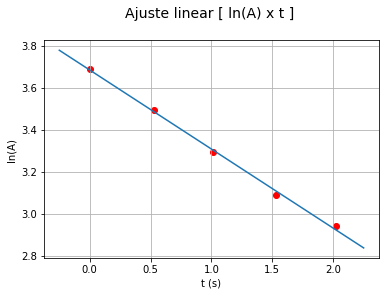

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#Ajuste linear
x = np.array([0,0.53,1.01,1.53,2.02])
y = np.array([3.688879,3.496508,3.295837,3.091042,2.944439])

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my

  var = np.var(x)
  
  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')

  #print('covariância=',cov,'variância=',var)
  #print('média x=',mx,'média y=',my)
  
  print('média x = {}\nmédia y = {}\ncov = {}\nvar = {}\nerro_a = {}\nerro_b = {}\ney = {}  '.format(mx,my,cov,var,erro_a,erro_b,ey))

  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

#Grafico Helio e Mercurio
x1 = np.linspace(-0.25,2.25, 1000) #colocar (valor mín (X) , valos max (x) , número de pontos que constiuem a curva)
y1 = parametros[0]*x1 + parametros[2]

plt.plot(x1, y1)
plt.scatter(x, y, color = 'red')
plt.xlabel("t (s)")
plt.ylabel("ln(A) ")
plt.title('Ajuste linear [ ln(A) x t ] \n',fontsize=14)
plt.grid(True)
plt.show()

